In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import utils
import utils_exponential_grid
from utils_exponential_grid import predictor_corrector_radial_shcrodinger_integrator_exponential_grid as integrator
from utils_exponential_grid import normlize_function_exponential_grid as normalizer
from utils_exponential_grid import predictor_corrector_radial_poisson_equation_electronic_potential_exponential_grid as poisson_integrator

In [3]:
occu_rule={1:{'n':1, 'l':0},
2:{'n':1,'l':0},
3:{'n':2,'l':0},
4:{'n':2,'l':0},
5:{'n':3,'l':1},
6:{'n':3,'l':1},
7:{'n':3,'l':1},
8:{'n':3,'l':1},
9:{'n':3,'l':1},
10:{'n':3,'l':1}}

max_energy_levels_by_l={0:2,1:3}

occupations_by_level=[2, 2, 2]

In [4]:
#kwargs={'r_max':15.0,'grid_points':2000,'delta':0.0001,  
#        'l':1, 'Z':2.0, 'E':-0.5, 'max_numb_elec':5}
##        'r_N':15.0, 'delta_x':0.001}

kwargs={'r_max':5.0,'grid_points':6000,'delta':0.00001,  
        'l':1, 'Z':6.0, 'E':-0.5, 'max_numb_elec':sum(occupations_by_level), 
        'max_energy_level':len(occupations_by_level),
        'occu_rule':occu_rule, 'max_energy_levels_by_l':max_energy_levels_by_l,
        'occupations_by_level':occupations_by_level}
#        'r_N':15.0, 'delta_x':0.001}

#if the wave functions explode while r-> 0.0 make the energy mesh smaller

Energy_kwargs={'r_max':None, 'grid_points':100,'delta':0.001}
Energy_kwargs['r_max']= (0.5*kwargs['Z']**2 + 0.2)

In [5]:
exp_grid= utils_exponential_grid.get_exponential_grid_reverse(kwargs)
exp_grid_back= utils_exponential_grid.get_exponential_grid_reverse(kwargs)
#exp_grid=  utils.get_uniform_r_grid(**kwargs) #just testing
ener_grid= -1.0*np.array(utils_exponential_grid.get_exponential_grid_reverse(Energy_kwargs))
#ener_grid= [-0.7, -0.4]#just testing

In [6]:
def get_ue_hydrogen(grid):
    r= np.array(grid)
    return -1.0*(np.multiply(np.add(r,1.0),np.exp(-2.0*r))) +1
ue_hydrogen=get_ue_hydrogen(exp_grid)
v_hart_hydro= np.divide(ue_hydrogen,exp_grid)


In [7]:
#initial conditions
w10= 1.0e-10#u_hydr[0]
w20= (w10 - 1.2e-10)/(exp_grid[0] - exp_grid[1])#(u_hydr[1] - u_hydr[0])/(exp_grid[0] - exp_grid[1])

In [8]:
v_hart=None
v_xc=None
basis= utils.get_u_basis_set(kwargs, exp_grid, ener_grid, 
                                             w10,w20,integrator, normalizer, v_hart, v_xc)

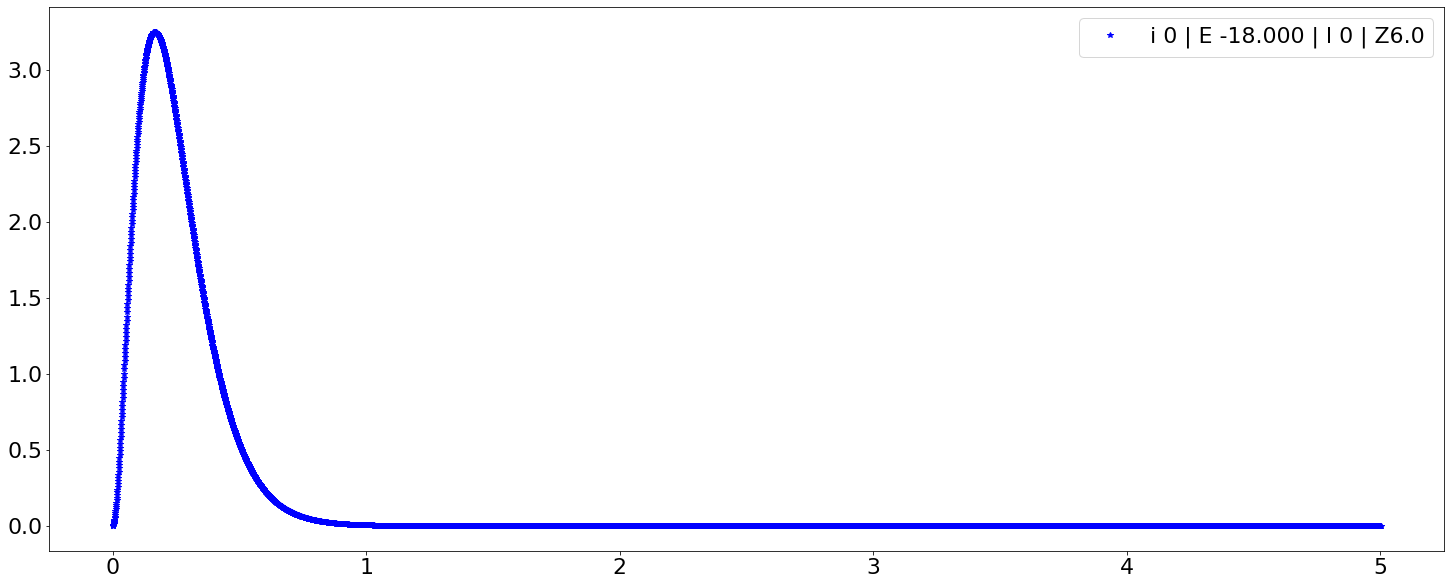

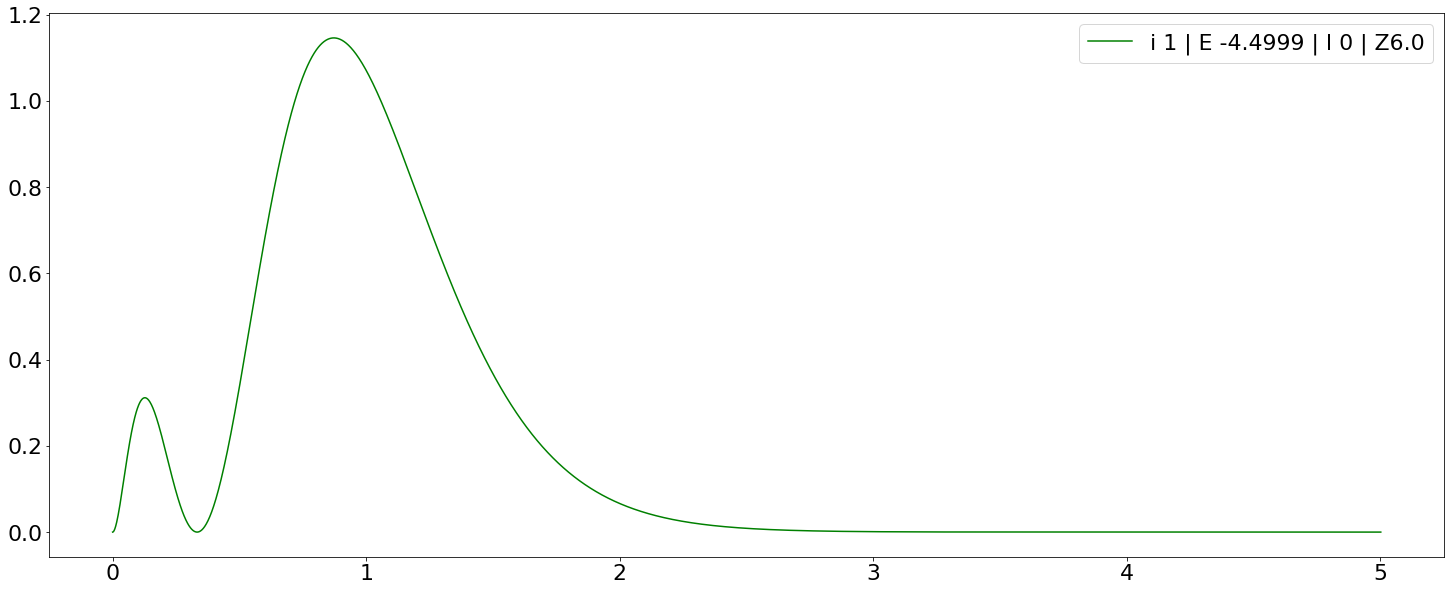

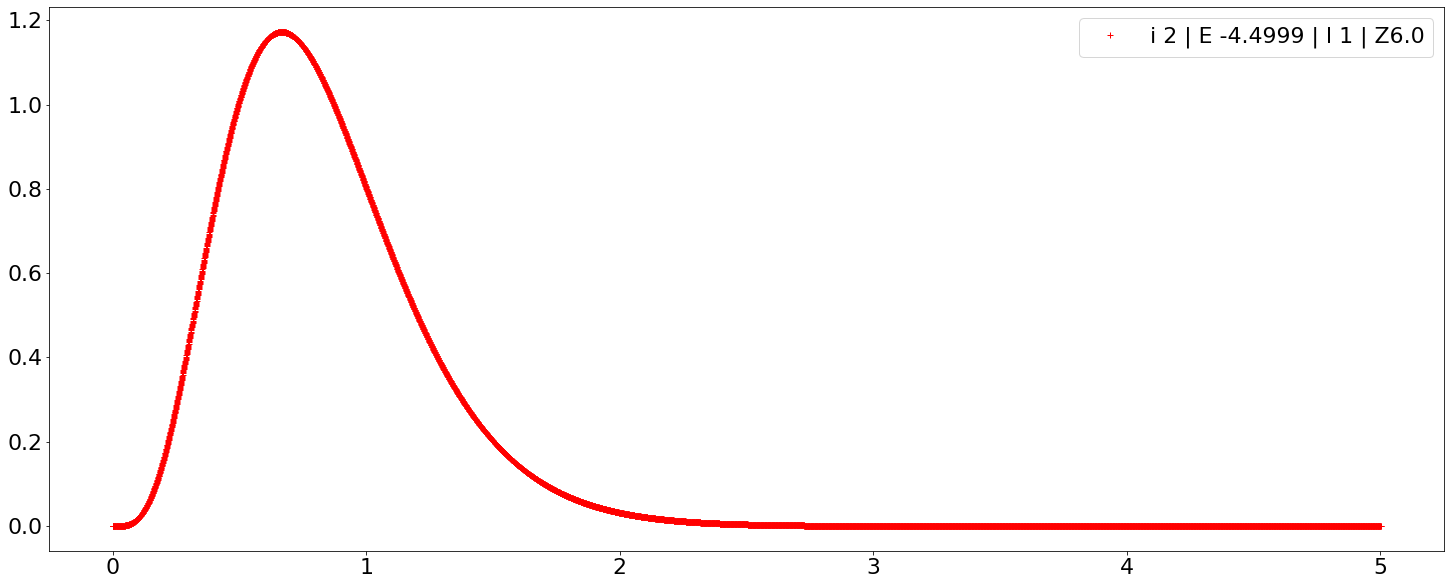

In [9]:
for i, _ in enumerate(basis):
    colo_symb=colors[i%len(colors)]+symbol[i%len(symbol)]
    label=f"i {i} | E {str(basis[i]['E'])[:7]} | l {str(basis[i]['l'])} | Z{basis[i]['kwargs']['Z']}"
    plt.plot(basis[i]['grid'],np.array(basis[i]['u'])**2,colo_symb,  label=label)
    plt.legend()
    plt.show()

In [10]:
#dev start

In [11]:
#u_dens= utils.get_u_dens(basis,kwargs)

#v_hart= utils_exponential_grid.get_V_hartree(exp_grid, u_dens, kwargs)

#v_xc= utils.get_v_xc(exp_grid, basis, kwargs)

In [12]:
#plt.plot(exp_grid,u_dens)
#plt.show()

In [13]:
#plt.plot(exp_grid,v_hart)
#plt.show()

In [14]:
#plt.plot(exp_grid,v_xc)
#plt.show()

In [15]:
#dev ends

In [16]:
E_befo=2.0
E= 1.0

eigen  -9.79788569418357
E_hart  6.197553503605665
E_xc  3.588975781383479
E  -33.83718656121841
________________________
eigen  -11.518564864507992
E_hart  4.878741990028764
E_xc  2.9433309935170175
E  -36.74885597816028
________________________
eigen  -10.797412224486688
E_hart  5.4271922782580315
E_xc  3.2457531171024225
E  -35.18173337705268
________________________
eigen  -11.126379255541558
E_hart  5.17380304191564
E_xc  3.1138805759748527
E  -35.85569412521915
________________________
eigen  -10.964229156355103
E_hart  5.2984373471650885
E_xc  3.1799964844910518
E  -35.50749212643671
________________________
eigen  -11.042932930950077
E_hart  5.237832352109269
E_xc  3.1481827494012373
E  -35.67336105760959
________________________
eigen  -11.00419009714691
E_hart  5.267646181340358
E_xc  3.163906426314367
E  -35.590862334370016
________________________
eigen  -11.023155408829666
E_hart  5.2530444911516625
E_xc  3.1562291218347416
E  -35.63105888233058
________________________
ei

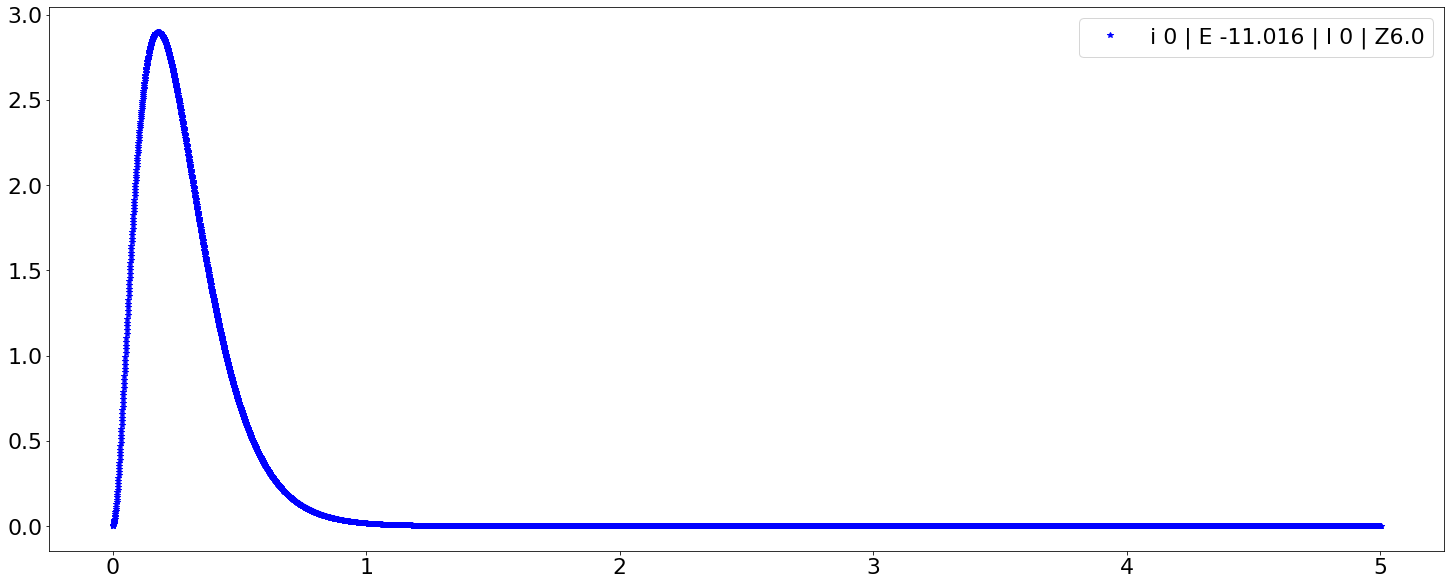

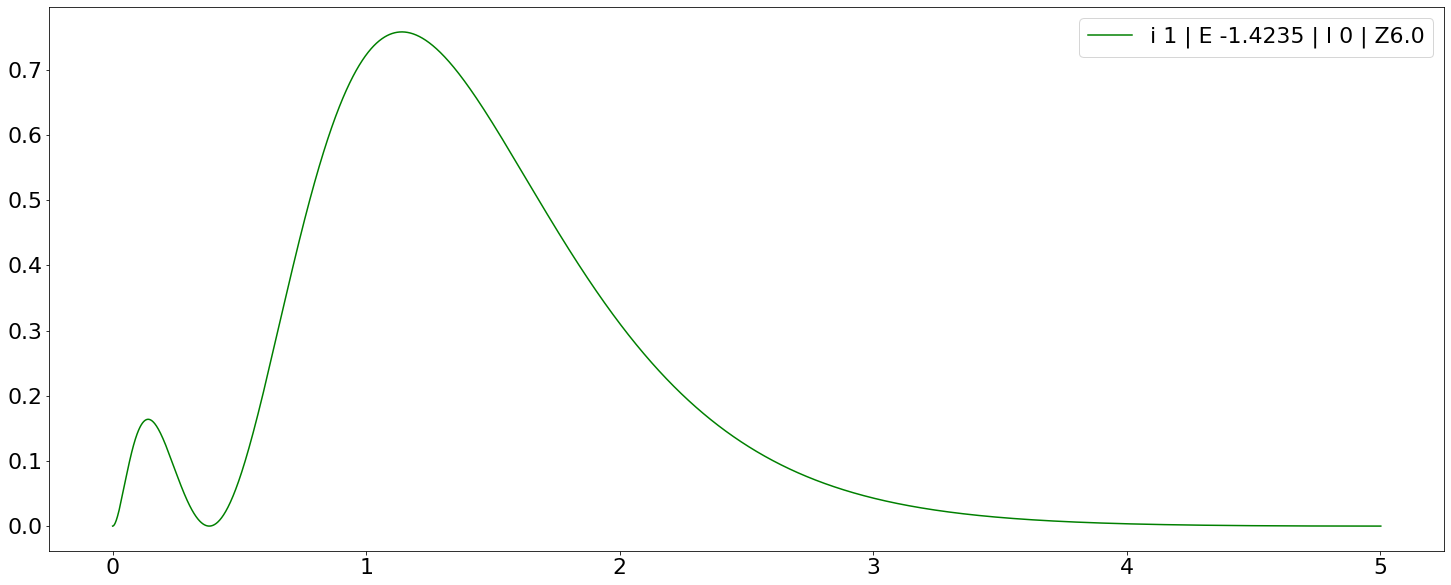

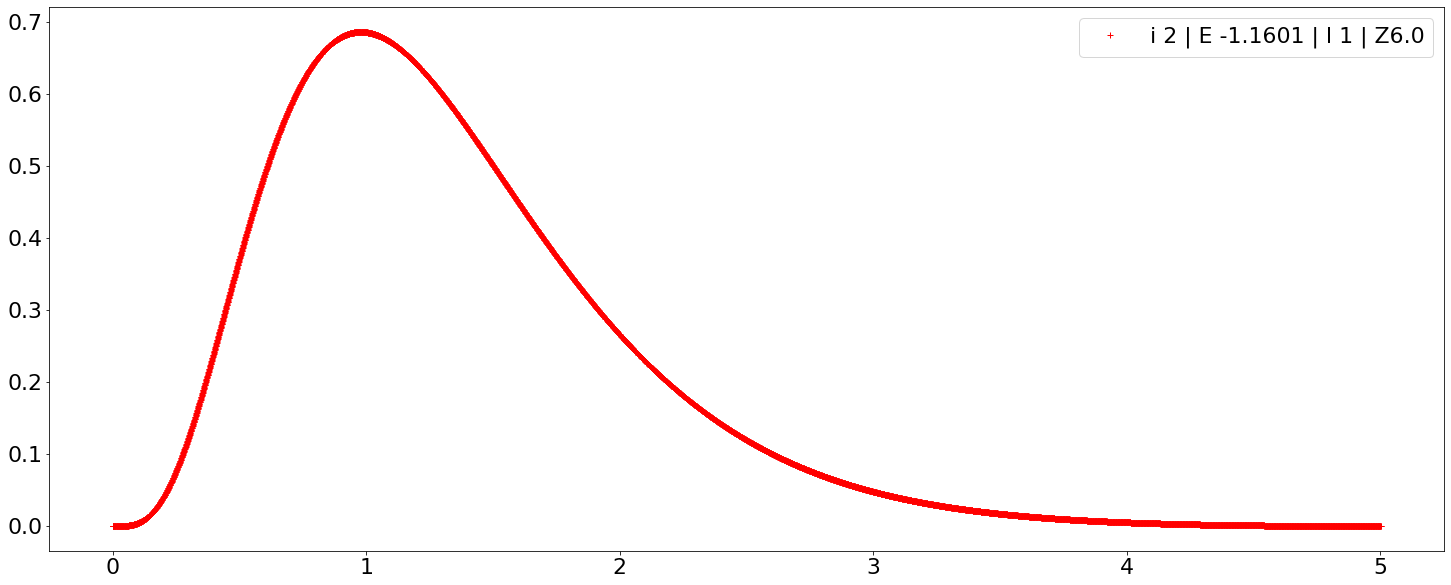

In [17]:
while abs(E_befo-E) > 10e-6:
    E_befo=E

    u_dens= utils.get_u_dens(basis,kwargs)

    v_hart= utils_exponential_grid.get_V_hartree(exp_grid, u_dens, kwargs)
    
    v_xc= utils.get_v_xc(exp_grid, basis, kwargs)



    basis= utils.get_u_basis_set(kwargs, exp_grid, ener_grid, 
                                                 w10,w20,integrator, normalizer, v_hart, v_xc)
    E_hart= 0.5*utils_exponential_grid.integrate_functions_exponential_grid(exp_grid, v_hart, 
                                                                        np.array(basis[0]['u'])**2)
    E_xc= utils_exponential_grid.integrate_functions_exponential_grid(exp_grid, v_xc, 
                                                                        np.array(basis[0]['u'])**2)
    eigen_ener= sum([i_occu*basis[i]['E'] for i,i_occu in enumerate(kwargs['occupations_by_level'])])
    E= eigen_ener - E_hart - E_xc
    print('eigen ', basis[0]['E'])
    print('E_hart ', E_hart)
    print('E_xc ', E_xc)
    print('E ', E)
    print('________________________')
for i, _ in enumerate(basis):
    colo_symb=colors[i%len(colors)]+symbol[i%len(symbol)]
    label=f"i {i} | E {str(basis[i]['E'])[:7]} | l {str(basis[i]['l'])} | Z{basis[i]['kwargs']['Z']}"
    plt.plot(basis[i]['grid'],np.array(basis[i]['u'])**2,colo_symb,  label=label)
    plt.legend()
    plt.show()